In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

### Import Libraries

In [3]:
ticker = 'INDF.JK'
data = yf.download(ticker, start='2015-01-01', end='2023-01-01')
data = data[['Close']]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


### Fetch Stock Data

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

### Normalize the Data

In [7]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

### Create Dataset for Training & Testing

In [9]:
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

### Split Data into Training & Testing Sets

In [11]:
time_step = 60  
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Prepare Training & Testing Data

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\ivanf\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Build the LSTM Model

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0826
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0081
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0041
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0037
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0034
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0037
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0031
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0032
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0028
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0026
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0027
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0024
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0025
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0025
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0026
Epoc

### Compile & Train the Model

In [17]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


### Make Predictions

In [19]:
years_to_predict = 3
future_steps = 1095
last_data = scaled_data[-time_step:]
predictions = []

for _ in range(future_steps):
    input_data = last_data.reshape(1, time_step, 1)
    pred = model.predict(input_data)[0][0]
    predictions.append(pred)
    last_data = np.append(last_data[1:], pred).reshape(time_step, 1)

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
future_dates = pd.date_range(start=data.index[-1], periods=future_steps + 1)[1:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━

### Predict Next 3 Year (1095 Days)

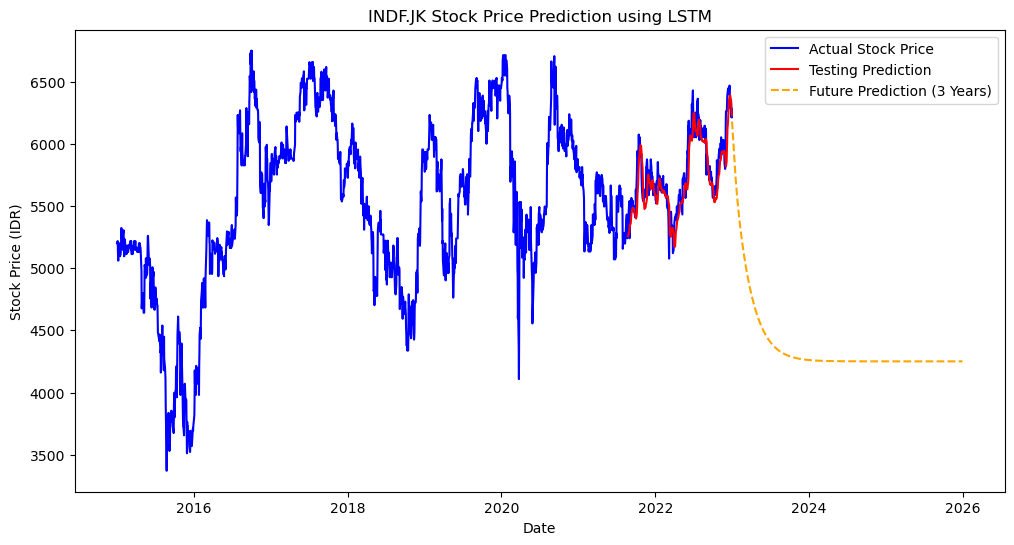

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Stock Price', color='blue')
plt.plot(data.index[-len(test_predict):], test_predict, label='Testing Prediction', color='red')
plt.plot(future_dates, predictions, label=f'Future Prediction ({years_to_predict} Years)', color='orange', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Stock Price (IDR)')
plt.title(f'{ticker} Stock Price Prediction using LSTM')
plt.legend()
plt.show()

### Plot The Result

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

y_test = np.array(y_test).reshape(-1, 1)
y_pred = np.array(y_pred).reshape(-1, 1)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
MAE: 0.0287647313202164
MSE: 0.0014014576400803794
RMSE: 0.037436047335160524
R² Score: 0.8201112558491593


C:\Users\ivanf\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Evaluate the performance of your LSTM model 

In [25]:
predicted_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted Price": predictions.flatten()
})
predicted_df

,Date,Predicted Price
0,2022-12-31,6178.434082
1,2023-01-01,6150.403809
2,2023-01-02,6121.542480
3,2023-01-03,6092.279785
4,2023-01-04,6062.898438
...,...,...
1090,2025-12-25,4250.695312
1091,2025-12-26,4250.695312
1092,2025-12-27,4250.695312
1093,2025-12-28,4250.695312


### Creates a Data Frame to store predicted stock prices along with their corresponding future dates

In [27]:
stock_symbol = "INDF.JK"
df2 = yf.download(stock_symbol, start="2015-01-01", end="2025-03-11")
df2

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,INDF.JK,INDF.JK,INDF.JK,INDF.JK,INDF.JK
Date,,,,,
2015-01-02,5199.977539,5199.977539,4781.187402,4781.187402,56582900
2015-01-05,5217.427246,5234.876836,5042.931352,5165.078478,24205800
2015-01-06,5147.628418,5217.426769,5095.279654,5130.178830,12161500
2015-01-07,5077.830078,5130.178842,5077.830078,5095.279666,19626100
2015-01-08,5060.381348,5130.179711,5060.381348,5112.730120,9449500
...,...,...,...,...,...
2025-03-04,7325.000000,7450.000000,7175.000000,7350.000000,6242600
2025-03-05,7425.000000,7475.000000,7275.000000,7325.000000,7505800


 ### Download historical stock data for a specific stock symbol using the yfinance library